In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from  skimage.feature import hog

In [2]:
import matplotlib.image as mpimg

In [3]:
import glob

In [4]:
car=glob.glob('D://BISM/Awesome_CV-main/Section6/data/car/**/*.png')

In [5]:
len(car)

8792

In [6]:
no_car=glob.glob('D://BISM/Awesome_CV-main/Section6/data/no car/**/*.png')

In [7]:
len(no_car)

8968

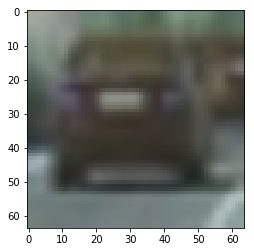

In [8]:
img=cv2.imread(car[0])
plt.imshow(img)

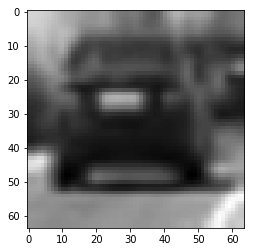

In [9]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

# get features of hog:


In [11]:
features, hog_image = hog(gray_img, orientations=11, pixels_per_cell=(16,16), cells_per_block=(2,2),  visualise=True, transform_sqrt=False, feature_vector=True, normalise=None)

features.shape 

C:\Users\kerolos\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(396,)

In [12]:
hog_image.shape

(64, 64)

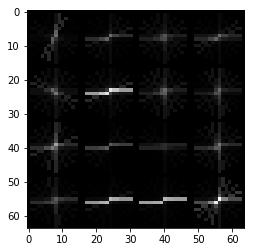

In [14]:
plt.imshow(hog_image,cmap='gray')

In [18]:
hog_cars_features=[]

for i in car:
    color_img=cv2.imread(i)
    gray_img=cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    features, hog_images = hog(color_img[:,:,0],
                              orientations=11,
                              pixels_per_cell=(16,16),
                              cells_per_block=(2,2),
                              visualise=True,
                              transform_sqrt=False,
                              feature_vector=True,
                              normalise=None)
    hog_cars_features.append(features)

    

C:\Users\kerolos\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [30]:
X_car=np.vstack(hog_cars_features).astype(np.float64)
y_car=np.ones(len(X_car))

In [21]:
hog_no_cars_features=[]

for i in no_car:
    color_img=cv2.imread(i)
    gray_img=cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    features, hog_images = hog(color_img[:,:,0],
                              orientations=11,
                              pixels_per_cell=(16,16),
                              cells_per_block=(2,2),
                              visualise=True,
                              transform_sqrt=False,
                              feature_vector=True,
                              normalise=None)
    hog_no_cars_features.append(features)

    

C:\Users\kerolos\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [25]:
X_nocar=np.vstack(hog_no_cars_features ).astype(np.float64)
y_nocar=np.zeros(len(X_nocar))

In [31]:
print(X_car.shape)
print(y_car.shape)

(8792, 396)
(8792,)


In [32]:
print(X_nocar.shape)
print(y_nocar.shape)

(8968, 396)
(8968,)


In [34]:
y_car

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [35]:
X=np.vstack((X_car,X_nocar))
y=np.hstack((y_car,y_nocar))

In [36]:
X.shape

(17760, 396)

# training the support vector machine classifier

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [40]:
from sklearn.svm import LinearSVC

In [42]:
svm_model=LinearSVC()
svm_model.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [44]:
y_predict=svm_model.predict(X_test )

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

In [48]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

        0.0       0.94      0.95      0.95      2219
        1.0       0.95      0.94      0.95      2221

avg / total       0.95      0.95      0.95      4440



In [49]:
confusion_matrix(y_test,y_predict)

[[2117  102]
 [ 128 2093]]


In [50]:
import seaborn as sns

In [51]:
cm=confusion_matrix(y_test,y_predict)

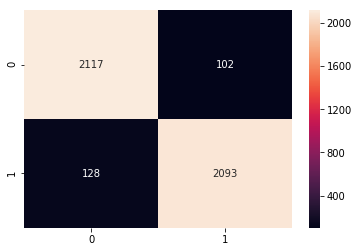

In [54]:
sns.heatmap(cm,annot=True,fmt='d')

In [59]:
valid_hog_image=hog_images.reshape(1,64,64)

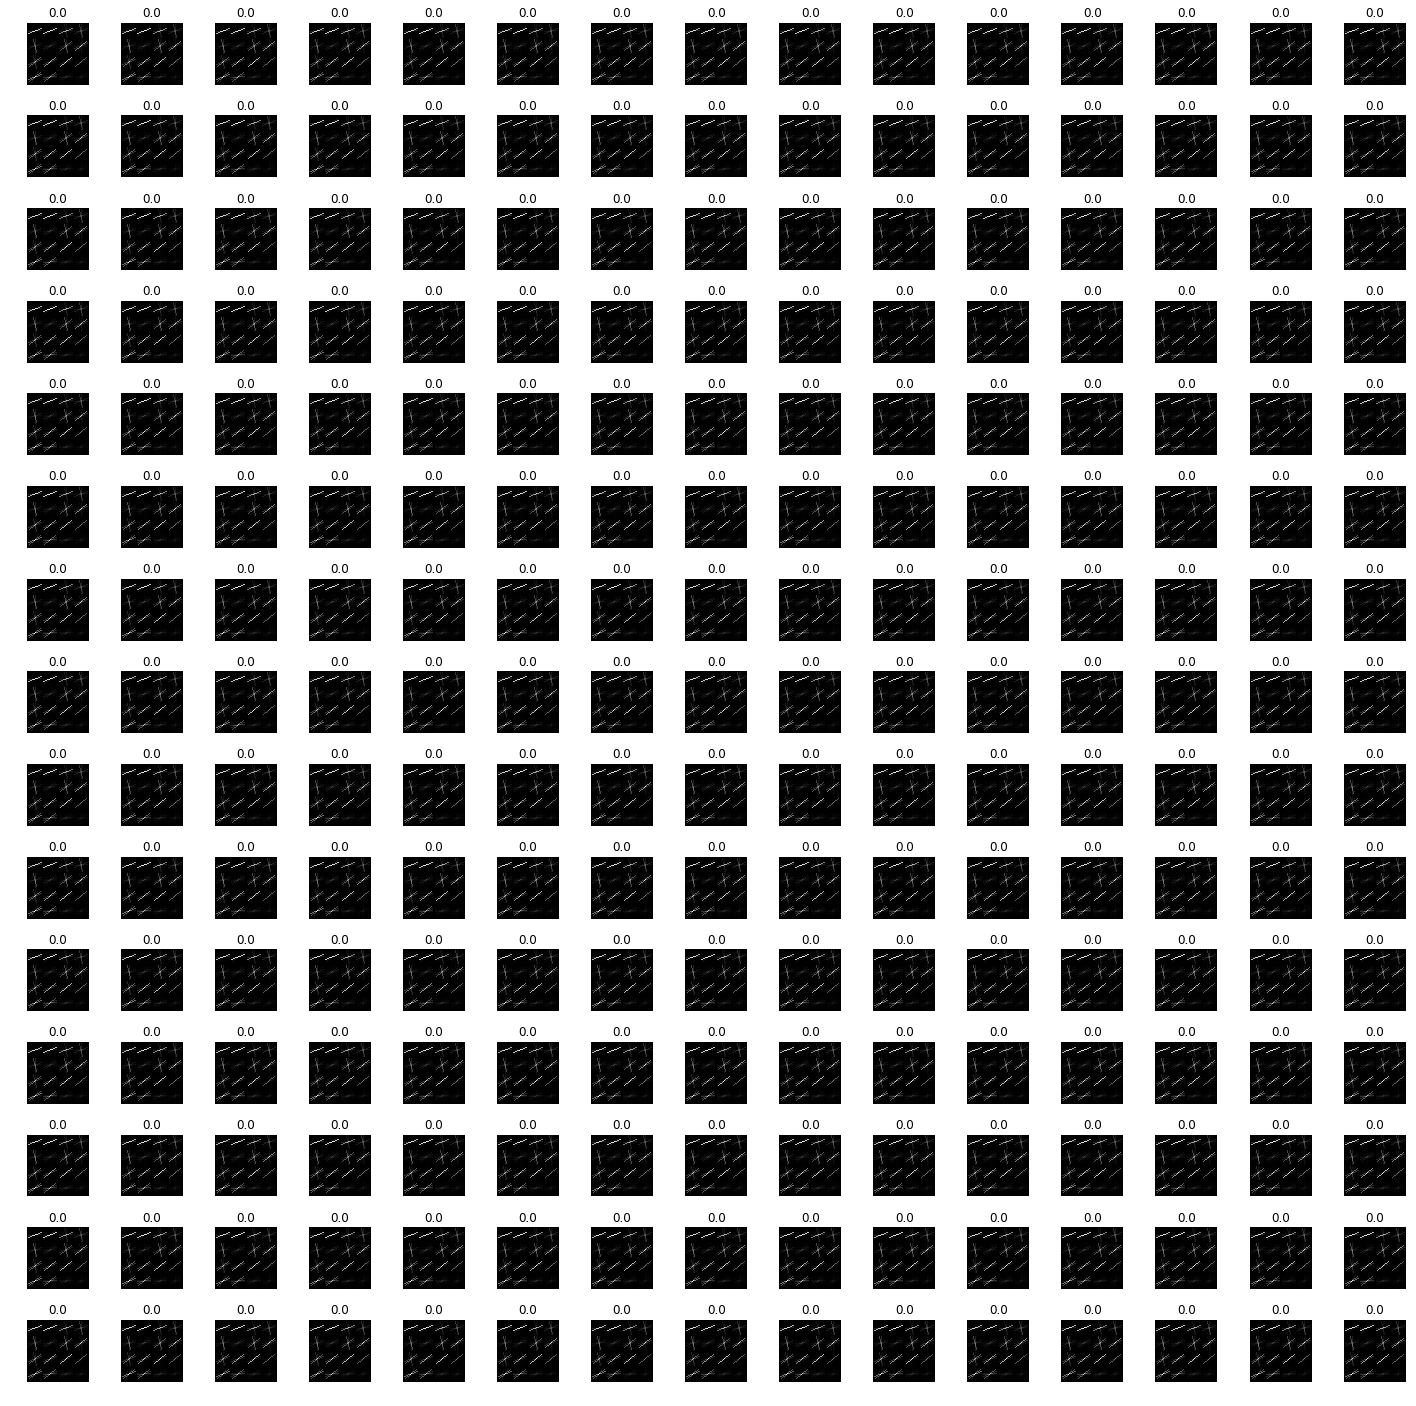

In [61]:
W_of_grid=15
l_of_grid=15
fig,axes=plt.subplots(W_of_grid,l_of_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len( valid_hog_image)
for i in np.arange(0,l_of_grid*W_of_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(valid_hog_image[index],cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(y_predict[index])
plt.subplots_adjust(hspace=0.5)


In [63]:
model_prediction_compared=svm_model.predict(X_test[:30])
print(model_prediction_compared)

[ 0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.]


In [64]:
model_truth_compared=y_test[:30]
print(model_prediction_compared)

[ 0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.]


# Improving the model

In [65]:
# we are going to use Gridsearch

In [78]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [80]:
grid=GridSearchCV( SVC(), param_grid , refit=True , verbose=4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9632965548299932, total=  20.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.7s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9626126126126127, total=  24.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.964181121874296, total=  23.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.8min remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9155595586579599, total=  39.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9056306306306307, total=  37.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.907411579184501, total=  49.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7894618329205134, total= 1.2min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7880630630630631, total= 1.2min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7956747015093489, total= 1.2min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.5066426480522405, total= 1.2min
[CV] C=0.1, gamma=0.001, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 37.0min finished


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      2219
        1.0       0.99      0.99      0.99      2221

avg / total       0.99      0.99      0.99      4440



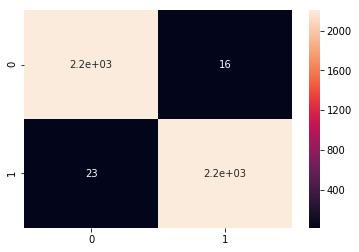

In [82]:
grid_predictions=grid.predict(X_test)
cm=confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,grid_predictions))


# let us test the model on an unknow image 

In [92]:
unknown_img=mpimg.imread('D://BISM//Awesome_CV-main/Section6/my_test_image_resized.jpg')

In [93]:
type(unknown_img)

numpy.ndarray

In [94]:
#image normalization

In [95]:
unknown_img=unknown_img.astype('float32')
unknown_img=unknown_img/255

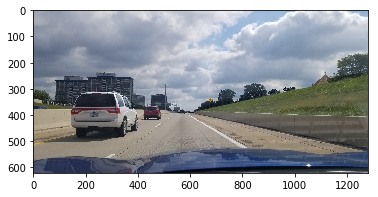

In [96]:
plt.imshow(unknown_img)

(180, 1280, 3)

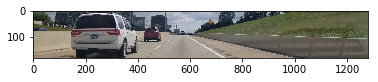

In [98]:
start = 300
stop = 480

pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 3 


masked_region = unknown_img[start:stop,:,:]
plt.imshow(masked_region)
masked_region.shape


In [99]:
resizing_factor = 2
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

In [101]:
L,W

(640.0, 90.0)

(90, 640, 3)


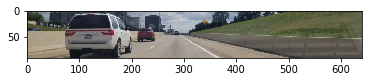

In [104]:
masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W)))
masked_region_resized_gray = masked_region_resized[:,:,0]

print(masked_region_resized.shape)
plt.imshow(masked_region_resized)


In [107]:
masked_region_hog_feature_all, hog_img = hog(masked_region_resized_gray, orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualise=True, feature_vector = False)


C:\Users\kerolos\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [110]:
n_blocks_x = (masked_region_resized_gray.shape[1] // pixels_in_cell)+1  
n_blocks_y = (masked_region_resized_gray.shape[0] // pixels_in_cell)+1

#nfeat_per_block = orientations * cells_in_block **2 
blocks_in_window = (64 // pixels_in_cell)-1 
    
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

rectangles_found = []

for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        print(hog_feat_sample.shape)  
        
        # predict using trained SVM
        test_prediction = svm_model.predict(hog_feat_sample.reshape(1,-1))
        # test_prediction = grid.predict(hog_feat_sample.reshape(1,-1))
        
        if test_prediction == 1: 
            rectangle_x_left = np.int(x_left * resizing_factor)
            rectangle_y_top = np.int(y_top * resizing_factor)
            window_dim = np.int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + start),(rectangle_x_left + window_dim, rectangle_y_top + window_dim + start)))
                

(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)


In [111]:
rectangles_found

[((192, 300), (320, 428)), ((384, 300), (512, 428))]

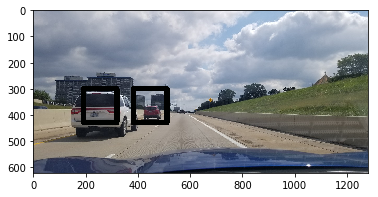

In [112]:
Image_with_Rectangles_Drawn = np.copy(unknown_img)
    
for rectangle in rectangles_found:
    cv2.rectangle(Image_with_Rectangles_Drawn, rectangle[0], rectangle[1], (0, 255, 0), 20)

plt.imshow(Image_with_Rectangles_Drawn)
        